차원축소

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris(as_frame=True)

In [3]:
iris.data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [4]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
df = iris.data
df['target'] = iris.target

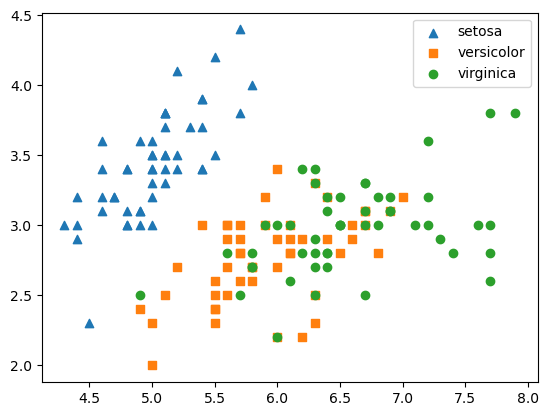

In [6]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x = df[df['target']==i]['sepal_length']
    y = df[df['target']==i]['sepal_width']
    plt.scatter(x,y,marker= marker,label = iris.target_names[i])
plt.legend()
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df_scaled = StandardScaler().fit_transform(df.iloc[:,:-1])

In [9]:
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [10]:
# 차원 축소
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 2)
# 두개로 줄이겠다.
iris_pca = pca.fit_transform(df_scaled)

In [12]:
iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [13]:
pca_columns=['pca_com_1','pca_com_2']
df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
df_pca['target']= iris.target


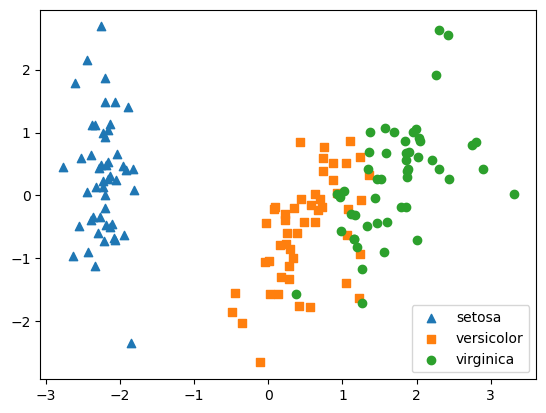

In [14]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x = df_pca[df_pca['target']==i]['pca_com_1']
    y = df_pca[df_pca['target']==i]['pca_com_2']
    plt.scatter(x,y,marker= marker,label = iris.target_names[i])
plt.legend()
plt.show()

In [15]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [16]:
# 100 % 안된다. 콜럼 압축 시 모든 데이터를 얘기하는 것이 아니다.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [18]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,iris.data.iloc[:,:-1],iris.target,scoring='accuracy',cv=3)
print(f'개별 정확도:{scores}, 평균 정확도:{np.mean(scores)}')

개별 정확도:[0.98 0.94 0.96], 평균 정확도:0.96


In [19]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,df_pca.iloc[:,:-1],iris.target,scoring='accuracy',cv=3)
print(f'개별 정확도:{scores}, 평균 정확도:{np.mean(scores)}')

개별 정확도:[0.88 0.88 0.88], 평균 정확도:0.88


In [20]:
# 차원 압축 후 (콜럼 개수 저하) 다중 공성선 문제를 일으켰던 컬럼 쌍의 경우 차이가 없기도 한다.

In [21]:
# 컬럼관 상관 관꼐를 확인하고, 서로 상관 관계가 높은 경우 pca로 묶어서 처리 가능하다.